In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [21]:
path="evaluation_errors/current_state"
full_lst=os.listdir(path)
log_error_lst=[]
noise_levels=[np.round(x, 2) for x in np.arange(0, 1.0, 1.0/20)]
noise_df=pd.DataFrame(columns=["exp", "synth"], index=noise_levels)

absolute_df=pd.DataFrame(columns=["values"], index=noise_levels)
data_lst=[]
for case in ["exp", "synth"]:
    for noise_level in noise_levels:
        log_error_lst=[]
        absolute_error_array_th=[]
        absolute_error_array_rh=[]
        absolute_error_array_sld=[]
        for filename in full_lst:
            noise_matches=re.findall(f".*\_({noise_level}).*_mse_errors_{case}.csv$", filename)
            
            if case=="exp":
                absolute_matches_th=re.findall(f".*\_({noise_level}).*\_th.csv$", filename)
                absolute_matches_rh=re.findall(f".*\_({noise_level}).*\_rh.csv$", filename)
                absolute_matches_sld=re.findall(f".*\_({noise_level}).*\_sld.csv$", filename)
                if absolute_matches_th:
                    absolute_error_array_th.append(np.loadtxt(os.path.join(path, f"{filename}")))
                if absolute_matches_rh:
                    absolute_error_array_rh.append(np.loadtxt(os.path.join(path, f"{filename}")))
                if absolute_matches_sld:
                    absolute_error_array_sld.append(np.loadtxt(os.path.join(path, f"{filename}")))
            if noise_matches:
                log_error_lst.append(np.loadtxt(os.path.join(path, f"{filename}")))
        noise_df.loc[noise_level, case]=log_error_lst
        if case=="exp":
            
            absolute_df.loc[noise_level, "values"]=[absolute_error_array_th, absolute_error_array_rh, absolute_error_array_sld]
        
absolute_df

,values
0.00,"[[[209.83828016226303, 389.2525977345264, 288...."
0.05,"[[[281.81151405549474, 240.1495572528927, 193...."
0.10,"[[[210.85569716895796, 303.1869226298307, 288...."
0.15,"[[[210.85569716895796, 303.1869226298307, 288...."
0.20,"[[[92.25543968504795, 20.39396974629522, 5.570..."
0.25,"[[[92.25543968504795, 20.39396974629522, 5.570..."
0.30,"[[[59.23615846163344, 181.2346332609464, 10.57..."
0.35,"[[[59.23615846163344, 181.2346332609464, 10.57..."
0.40,"[[[316.4292843477992, 406.1226821799888, 115.4..."
0.45,"[[[316.4292843477992, 406.1226821799888, 115.4..."


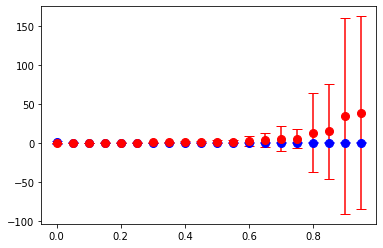

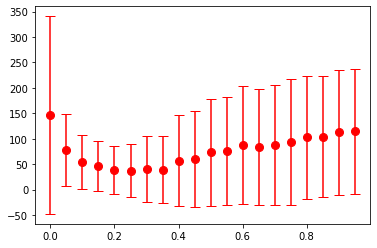

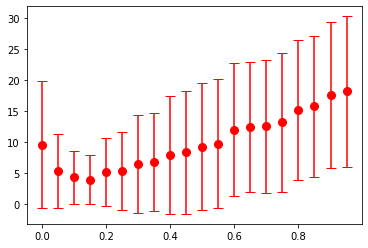

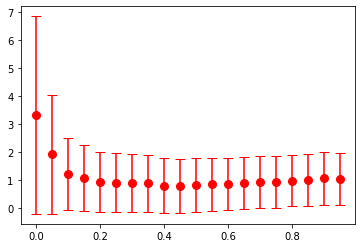

In [22]:
prev_value = 1
name = ""
fig, ax = plt.subplots(1)
for case, color in zip(["exp", "synth"], ["blue", "red"]):
    for noise_level in noise_levels:
        ax.errorbar(noise_level, np.mean(np.array(noise_df.loc[noise_level, case])), np.std(np.array(noise_df.loc[noise_level, case])), fmt='o', markersize=8, capsize=5, color=color)
for param_idx, param in enumerate(["th", "rh", "sld"]):
    fig, ax = plt.subplots(1)
    for noise_level in noise_levels:
        ax.errorbar(noise_level, np.mean(np.array(absolute_df.loc[noise_level, "values"][param_idx])), np.std(np.array(absolute_df.loc[noise_level, "values"][param_idx])), fmt='o', markersize=8, capsize=5, color=color)
# noise_dict
# for file in log_error_lst:
#     noise = re.findall("0\.\d", file)[-1]
#     print(noise)
#     data = pd.read_csv(f"evaluation_log_noise/{file}")
#     print(data)
#     data_mean = data.values.mean()
#     data_std = data.values.std()
#     print(data_std)
#     ax.errorbar(float(noise), data_mean, data_std,
#                 fmt='o', markersize=8, capsize=5)
